In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
load_iris = load_iris()
X = load_iris.data
y = load_iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])
param_distributions = {
    'classifier__n_estimators': [10, 50, 100],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
}
search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=3, random_state=42)
search.fit(X_train, y_train)
y_pred = search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



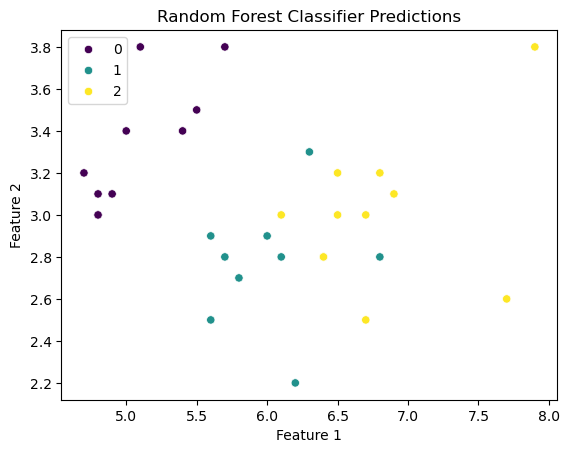

In [3]:
import seaborn as sns
plot = sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred, palette='viridis')
import matplotlib.pyplot as plt
plt.title('Random Forest Classifier Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
